<a href="https://colab.research.google.com/github/gokul1794/ashrae-kaggle/blob/master/ashrae_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
ashrae_train = pd.read_csv('/content/gdrive/My Drive/AshDataset/train.csv')
weather_train = pd.read_csv('/content/gdrive/My Drive/AshDataset/weather_train.csv')
building_metadata = pd.read_csv('/content/gdrive/My Drive/AshDataset/building_metadata.csv')
#ashrae_test = pd.read_csv(path+'test.csv')
#weather_test = pd.read_csv(path+'weather_test.csv')

In [5]:
ashrae_train.head(5)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [6]:
building_metadata.head(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [0]:
buildings = pd.merge(ashrae_train, building_metadata, on='building_id')

In [8]:
buildings.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06
mean,7.992780e+02,6.624412e-01,2.117121e+03,7.992232e+00,1.077830e+05,1.968277e+03,4.184848e+00
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,3.020815e+01,4.008277e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1.951000e+03,1.000000e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1.969000e+03,3.000000e+00
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1.993000e+03,6.000000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01


In [9]:
primary = buildings['primary_use'].unique()
primary
#buildings['primary_use']
#buildings.describe()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [0]:
buildings['primary_use'] = buildings['primary_use'].astype('category')

In [11]:
buildings['primary_use'].describe()

count      20216100
unique           16
top       Education
freq        8165504
Name: primary_use, dtype: object

In [0]:
buildings = pd.merge(buildings, weather_train, on=['site_id','timestamp'])

In [13]:
buildings.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [14]:
buildings['meter_reading'].describe()

count    2.012560e+07
mean     2.124813e+03
std      1.535796e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.875000e+01
75%      2.678430e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

In [15]:
buildings.count()

building_id           20125605
meter                 20125605
timestamp             20125605
meter_reading         20125605
site_id               20125605
primary_use           20125605
square_feet           20125605
year_built             8012299
floor_count            3495553
air_temperature       20119442
cloud_coverage        11390735
dew_temperature       20115960
precip_depth_1_hr     16467077
sea_level_pressure    18984431
wind_direction        18767052
wind_speed            20072424
dtype: int64

In [16]:
buildings.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

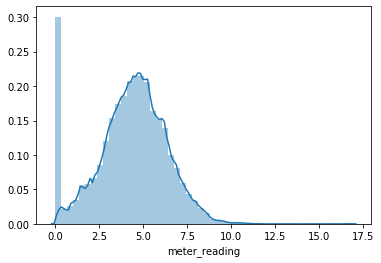

In [20]:
sns.distplot(np.log1p(buildings['meter_reading']))
plt.show()

In [21]:
buildings[buildings['meter_reading'] == 0].count()

building_id           1867887
meter                 1867887
timestamp             1867887
meter_reading         1867887
site_id               1867887
primary_use           1867887
square_feet           1867887
year_built             775515
floor_count            251934
air_temperature       1866766
cloud_coverage        1024353
dew_temperature       1866379
precip_depth_1_hr     1646840
sea_level_pressure    1830126
wind_direction        1751060
wind_speed            1862877
dtype: int64

In [22]:
#Calculate Percentage of Missing Values
percent_missing = buildings.isnull().sum() * 100 / len(buildings)
missing_value_df = pd.DataFrame({'Percentage Missing': percent_missing})
missing_value_df

,Percentage Missing
building_id,0.000000
meter,0.000000
timestamp,0.000000
meter_reading,0.000000
site_id,0.000000
primary_use,0.000000
square_feet,0.000000
year_built,60.188531
floor_count,82.631315
air_temperature,0.030623


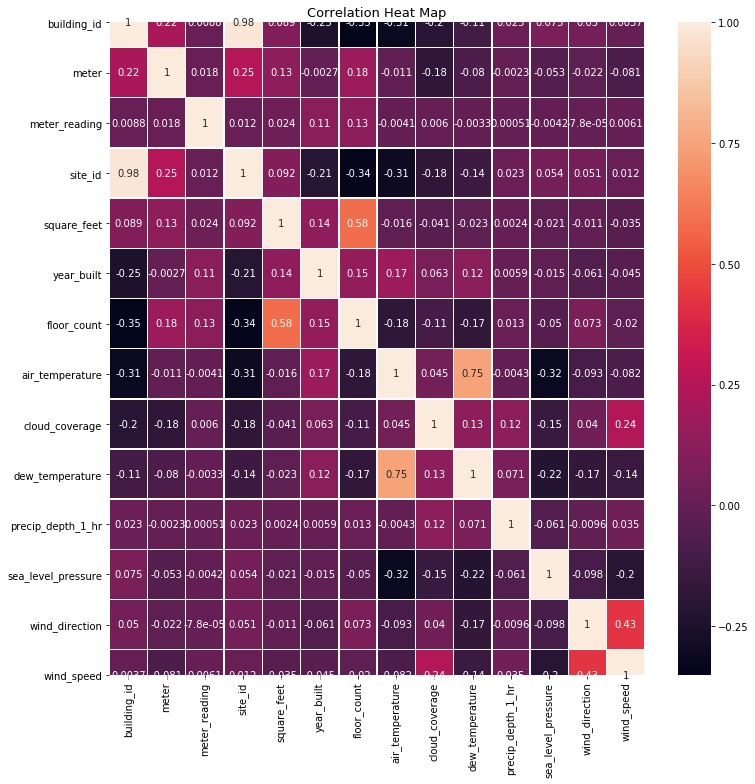

In [23]:
corr = buildings.corr()
plt.figure(figsize=(12, 12))
#display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5)
plt.title('Correlation Heat Map', fontsize=13)
plt.show()

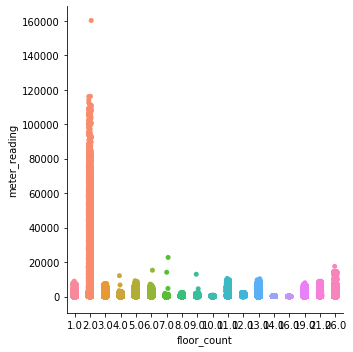

In [26]:
sns.catplot(x="floor_count",y="meter_reading",data=buildings)

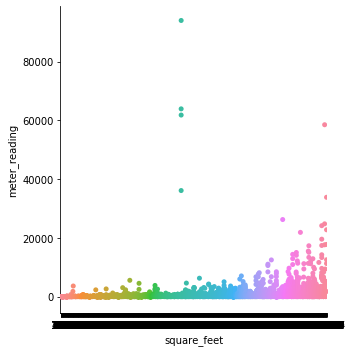

In [27]:
sns.catplot(x="square_feet",y="meter_reading",data=buildings.sample(n=10000, random_state=4812486))

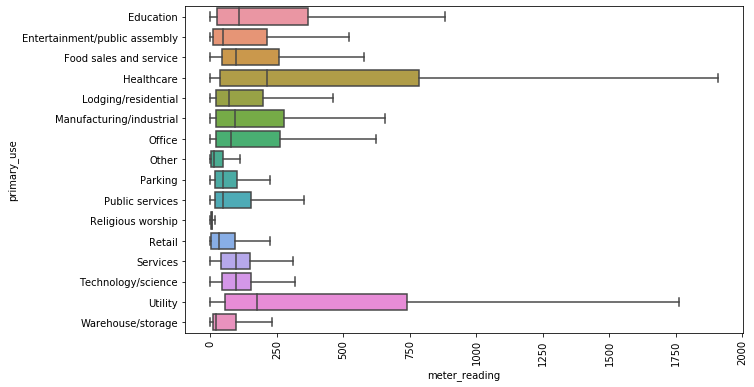

In [28]:
#Consumption by type of building use
plt.figure(figsize=(10,6))
sns.boxplot(x='meter_reading', y='primary_use', data=buildings, showfliers=False)
plt.xticks(rotation='vertical')
plt.show()

In [0]:
#saving uncleaned full dataset
uncleanedBuildings = buildings

In [0]:
drop_features = ["year_built", "timestamp", "floor_count","precip_depth_1_hr","cloud_coverage", "wind_direction", ]
buildings.drop(drop_features, axis=1, inplace=True)

In [31]:
buildings.count()

building_id           20125605
meter                 20125605
meter_reading         20125605
site_id               20125605
primary_use           20125605
square_feet           20125605
air_temperature       20119442
dew_temperature       20115960
sea_level_pressure    18984431
wind_speed            20072424
dtype: int64

In [0]:
buildings.dropna(inplace=True)

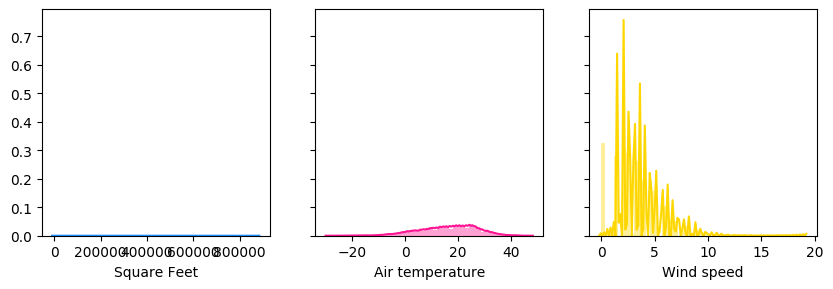

In [33]:
# plot
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(buildings['square_feet'] , color="dodgerblue", ax=axes[0], axlabel='Square Feet')
sns.distplot(buildings['air_temperature'] , color="deeppink", ax=axes[1], axlabel='Air temperature')
sns.distplot(buildings['wind_speed'] , color="gold", ax=axes[2], axlabel='Wind speed')

In [34]:
buildings.count()

building_id           18935508
meter                 18935508
meter_reading         18935508
site_id               18935508
primary_use           18935508
square_feet           18935508
air_temperature       18935508
dew_temperature       18935508
sea_level_pressure    18935508
wind_speed            18935508
dtype: int64

In [0]:
buildings['primary_use_codes'] = buildings['primary_use'].cat.codes

In [0]:
drop_features = ["primary_use"]
buildings.drop(drop_features, axis=1, inplace=True)

In [37]:
buildings.head(5)

,building_id,meter,meter_reading,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_speed,primary_use_codes
0,0,0,0.0,0,7432,25.0,20.0,1019.7,0.0,0
1,1,0,0.0,0,2720,25.0,20.0,1019.7,0.0,0
2,2,0,0.0,0,5376,25.0,20.0,1019.7,0.0,0
3,3,0,0.0,0,23685,25.0,20.0,1019.7,0.0,0
4,4,0,0.0,0,116607,25.0,20.0,1019.7,0.0,0


In [0]:
buildings.dropna(inplace=True)

In [39]:
buildings.count()

building_id           18935508
meter                 18935508
meter_reading         18935508
site_id               18935508
square_feet           18935508
air_temperature       18935508
dew_temperature       18935508
sea_level_pressure    18935508
wind_speed            18935508
primary_use_codes     18935508
dtype: int64

In [0]:
buildings1=buildings.sample(500000,random_state=24988678)

In [57]:
import numpy as np

from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

X, y = shuffle(buildings1, buildings1['meter_reading'], random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 2095096.7370


Text(0, 0.5, 'Deviance')

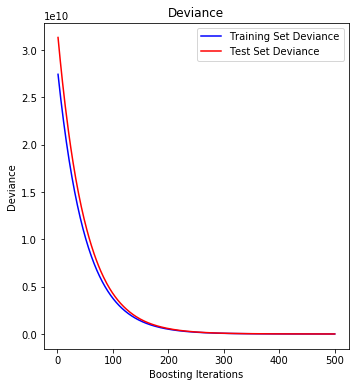

In [58]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [59]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, clf.predict(X_test) ))

MAE: 94.0675


1.9233570028335598

In [60]:
y_test.count()

50000

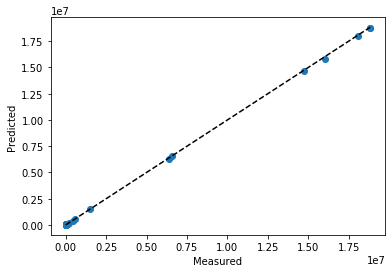

In [61]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

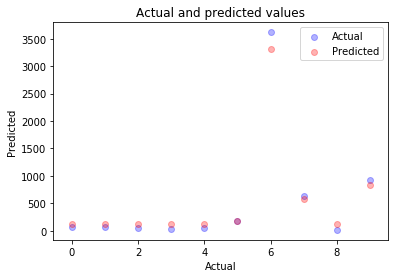

In [62]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, 10), y=y_test.head(10), c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, 10), y=y_pred[:10], c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

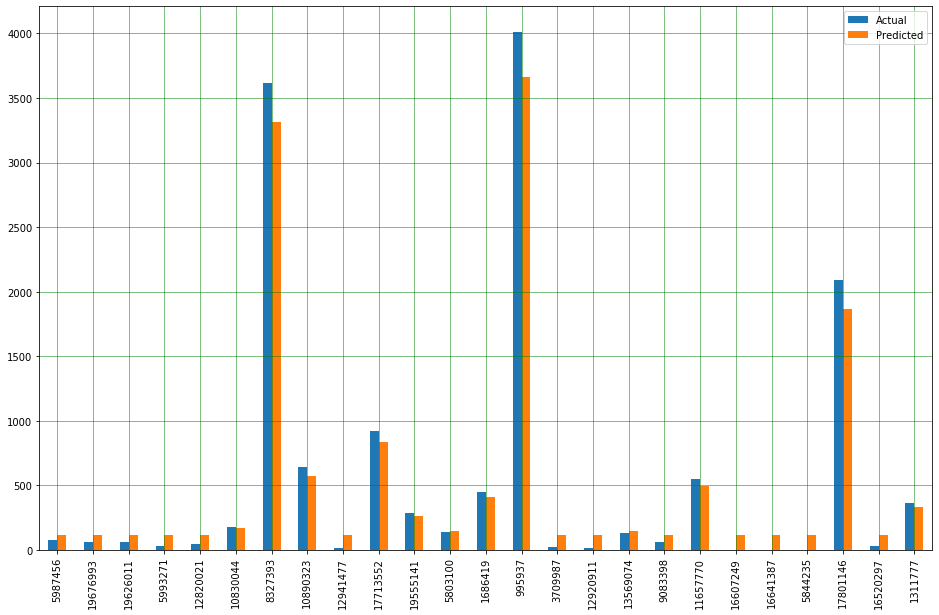

In [63]:
Lineardf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
Lineardf = Lineardf.head(25)
Lineardf.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_pred ))

1.9233570028335598

In [65]:
y_test.head(10)

5987456       73.4700
19676993      60.8750
19626011      58.4025
5993271       29.0000
12820021      49.5854
10830044     173.8500
8327393     3617.8700
10890323     639.5740
12941477      14.6600
17713552     924.7030
Name: meter_reading, dtype: float64

In [66]:
y_pred[:10]

array([ 114.98675527,  114.98675527,  114.98675527,  114.98675527,
        114.98675527,  172.92056353, 3317.32791021,  574.1996101 ,
        114.98675527,  833.7106604 ])

In [67]:
len(y_pred)

50000

In [68]:
buildings.head(5)

,building_id,meter,meter_reading,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_speed,primary_use_codes
0,0,0,0.0,0,7432,25.0,20.0,1019.7,0.0,0
1,1,0,0.0,0,2720,25.0,20.0,1019.7,0.0,0
2,2,0,0.0,0,5376,25.0,20.0,1019.7,0.0,0
3,3,0,0.0,0,23685,25.0,20.0,1019.7,0.0,0
4,4,0,0.0,0,116607,25.0,20.0,1019.7,0.0,0


In [0]:
#Trying our model on the Test Dataset for submission.

In [70]:
buildings_test = pd.merge(ashrae_test, building_metadata, on='building_id')

NameError: ignored

In [0]:
buildings_test['primary_use'] = buildings_test['primary_use'].astype('category')

In [0]:
buildings_test = pd.merge(buildings_test, weather_test, on=['site_id','timestamp'])

In [0]:
drop_features = ["timestamp", "sea_level_pressure", "wind_direction", "wind_speed"]
buildings_test.drop(drop_features, axis=1, inplace=True)

In [0]:
buildings_test.count()

In [0]:
buildings_test['floor_count'].fillna(4, inplace = True)

In [0]:
buildings_test['precip_depth_1_hr'].fillna(0, inplace = True)

In [0]:
buildings_test['primary_use_codes'] = buildings_test['primary_use'].cat.codes
drop_features = ["primary_use"]
buildings_test.drop(drop_features, axis=1, inplace=True)

In [0]:
#buildings_test.drop("row_id", axis=1, inplace=True)

In [0]:
buildings_test.describe()